In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('/content/Housing.csv')

In [4]:
data = data[['price', 'stories', 'parking', 'bathrooms']]

In [9]:
# Initial exploration
print(data.info())
print(data.describe())
print("NO.of rows and columns:",data.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   stories    545 non-null    int64
 2   parking    545 non-null    int64
 3   bathrooms  545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB
None
              price     stories     parking   bathrooms
count  5.450000e+02  545.000000  545.000000  545.000000
mean   4.766729e+06    1.805505    0.693578    1.286239
std    1.870440e+06    0.867492    0.861586    0.502470
min    1.750000e+06    1.000000    0.000000    1.000000
25%    3.430000e+06    1.000000    0.000000    1.000000
50%    4.340000e+06    2.000000    0.000000    1.000000
75%    5.740000e+06    2.000000    1.000000    2.000000
max    1.330000e+07    4.000000    3.000000    4.000000
NO.of rows and columns: (545, 4)


In [11]:
X = data.drop('price', axis=1)
y = data['price']
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

LinearRegression()

TRAINING : 0.428
TESTING: 0.425
ON TEST SET: 0.425


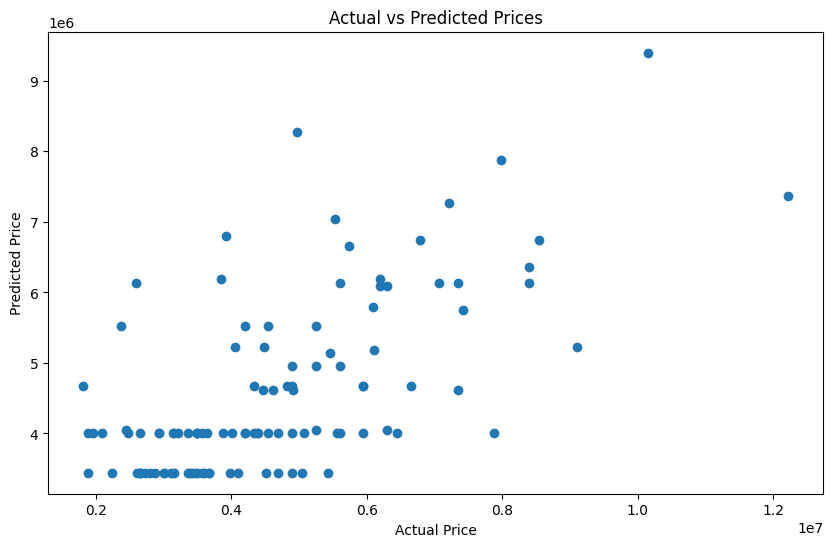

In [18]:
train_score = linear_regression.score(X_train_scaled, y_train)
test_score = linear_regression.score(X_test_scaled, y_test)
print(f"TRAINING : {train_score:.3f}")
print(f"TESTING: {test_score:.3f}")

# Predictions
predictions = linear_regression.predict(X_test_scaled)
r2 = r2_score(y_test, predictions)
print(f"ON TEST SET: {r2:.3f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()